In [4]:
from standardInclude import *

In [5]:
file = "./data/gm2nearline_histsOnly_run24795.root"
f = r.TFile(file) #eventually get from command line
runNum = int(file.split("run")[1].split(".")[0])
print("Starting run:", runNum)

Starting run: 24795


In [6]:
f.ls()

TFile**		./data/gm2nearline_histsOnly_run24795.root	
 TFile*		./data/gm2nearline_histsOnly_run24795.root	
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAnalyzer;1	ibmsAnalyzer (IBMSAnalyzer) folder
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	FastRotation;1	FastRotation


In [15]:
allCaloWiggle = f.Get("nearlineHistTree").Get("allCaloWiggle").Clone()
allCaloWiggle.SetTitle("T-Method [E > 1700 MeV] For All Calorimeters")
allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
allCaloWiggle.GetXaxis().SetRangeUser(30,300)
allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

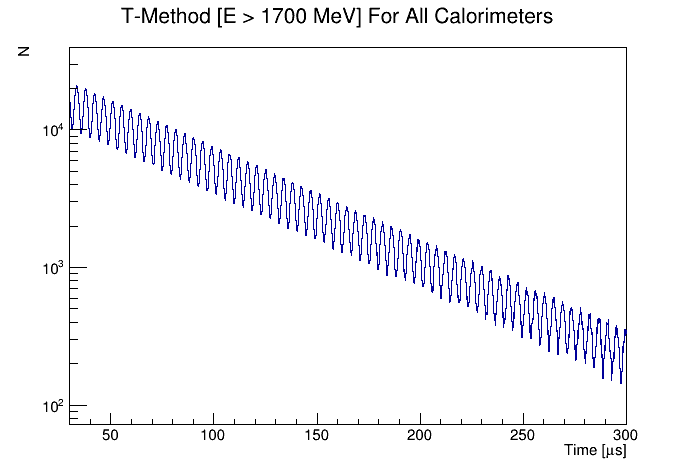

In [16]:
c = r.TCanvas()
allCaloWiggle.Draw()
c.SetLogy()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


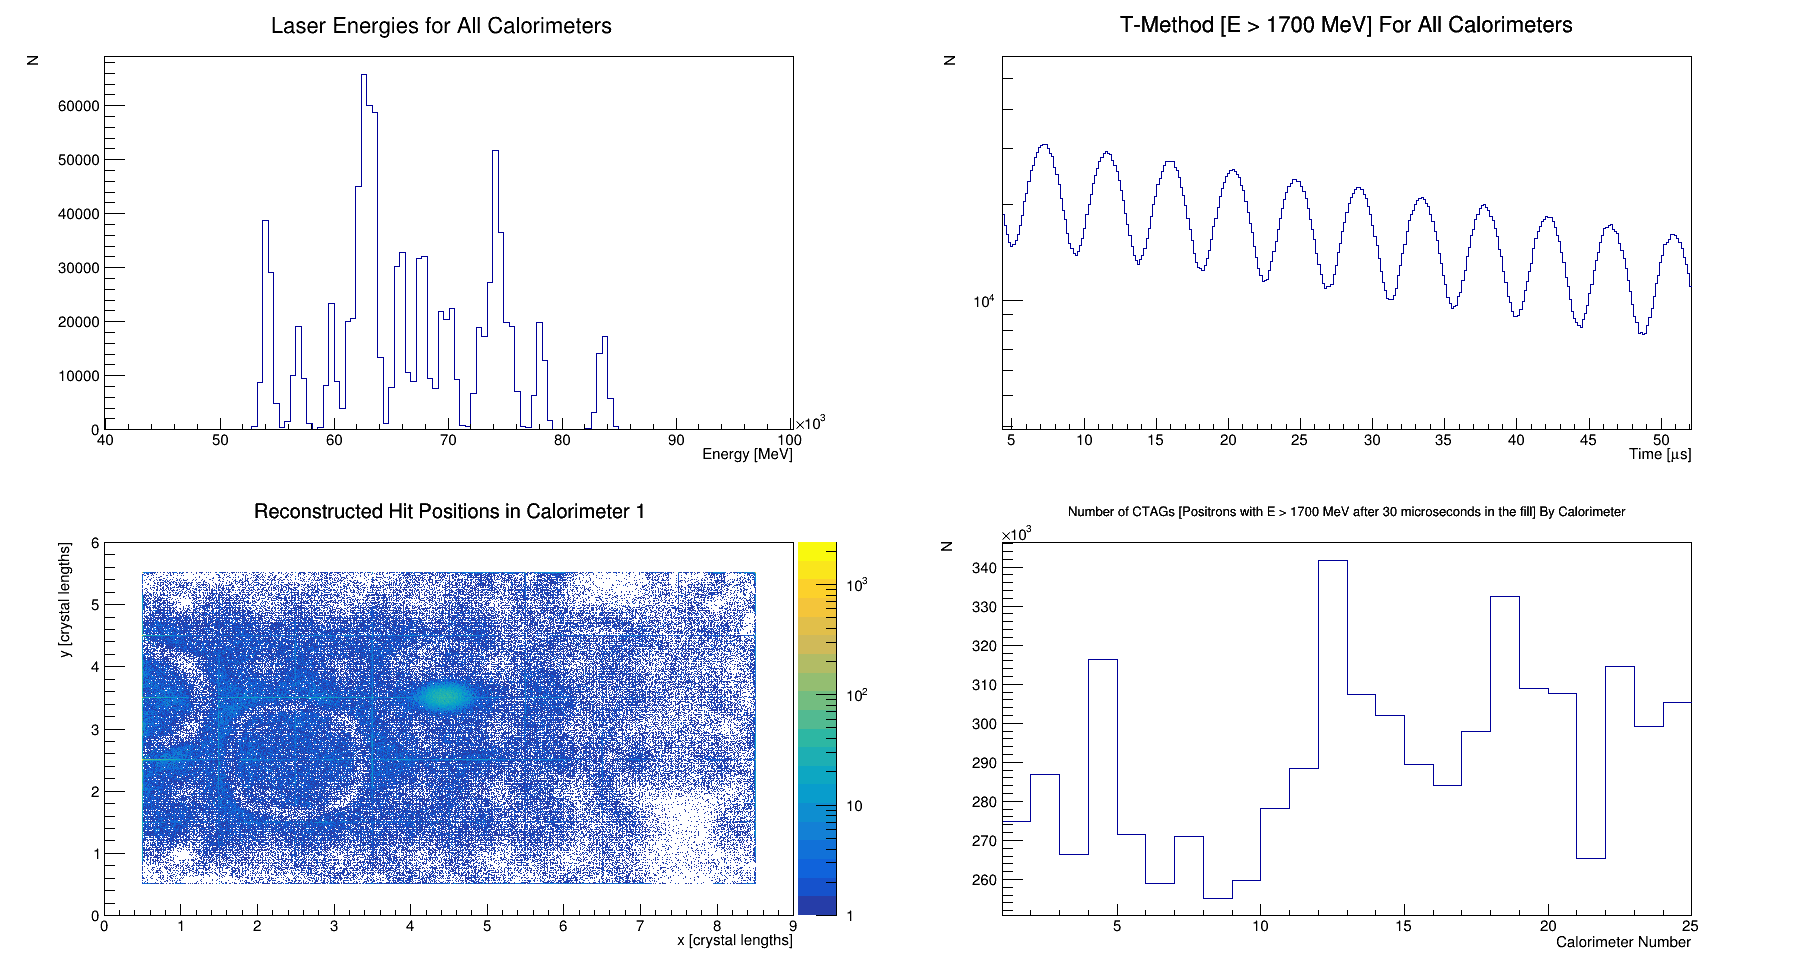

In [31]:
c = r.TCanvas("c","c",1800,1000)
c.Divide(2,2)
c.cd(1)
allCaloEnergies = f.Get("nearlineHistTree").Get("allCaloEnergies").Clone()
allCaloEnergies.SetTitle("Laser Energies for All Calorimeters; Energy [MeV]; N")
allCaloEnergies.GetXaxis().SetRangeUser(40000,100000)
allCaloEnergies.Draw()
c.Draw()

c.cd(2)
allCaloWiggle.Draw()
r.gPad.SetLogy()

c.cd(3)
ding = f.Get("nearlineHistTree").Get("calo1").Get("hitPositions").Clone()
ding.SetTitle("Reconstructed Hit Positions in Calorimeter 1; x [crystal lengths]; y [crystal lengths]")
r.gPad.SetLogz()
ding.Draw("colz")

c.cd(4)
farlineCtag = f.Get("nearlineHistTree").Get("nearlineCTag").Clone()
farlineCtag.SetTitle("Number of CTAGs [Positrons with E > 1700 MeV after 30 microseconds in the fill] By Calorimeter; Calorimeter Number; N")
farlineCtag.Draw()